In [247]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math

%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [248]:
def generate_fixed_point_cloud():
    points = np.array([
        [0.274791784, -1.001679346, -1.851320839, 0.365840754],
        [-1.155674199, -1.215133985, 0.053119249, 1.162878076],
        [1.216239624, 0.764265677, 0.956099579, 1.198231236]])
    
    return points

In [249]:
def generate_point_cloud_for_plane():
    x = np.linspace(-3,3,10)
    y = np.linspace(-3,3,10)

    X,Y = np.meshgrid(x,y)
    # plane equation coefficient are a = 0.5, b = 0.3, c = 0.25, d = 2
    a = 1
    b = 1
    c = 1
    d = 1
    Z = (d - a*X - b*Y)/c

    xs = X.flatten()
    ys = Y.flatten()
    zs = Z.flatten()
    points = np.array([xs, ys, zs])
    
    return points

In [250]:
def distance(X,p):
    plane = p[0:3]
    distance = (plane*X.T).sum(axis=1) - p[3]
    return distance / np.linalg.norm(plane)

def residuals(params, signal, X):
    return distance(X, params)

In [251]:
def get_initial_plane_coefficient():
    """ 
    plane equation is aX + bY + cZ = d
    plane_coeff = [a, b, c, d]
    """
    plane_coeff = [0.506645455682, -0.185724560275, -1.43998120646, 1.37626378129]
    
    return plane_coeff

In [252]:
# points = generate_fixed_point_cloud()
points = generate_point_cloud_for_plane()

In [253]:
plane_coeff = get_initial_plane_coefficient()

solution = leastsq(residuals, plane_coeff, args=(None, points))[0]

In [254]:
print("a = ", solution[0], "b = ", solution[1], "c = ", solution[2], "d = ", solution[3])

a =  -2.050595323390103 b =  -2.050595323390103 c =  -2.050595323390103 d =  -2.050595323390103


In [255]:
print("old offset = ", (distance(points, plane_coeff)**2).sum())
print("new offset =  ", (distance(points, solution)**2).sum())

old offset =  1166.8901577570782
new offset =   2.4544767058744565e-30


In [256]:
fig = plt.figure()

<Figure size 921.6x691.2 with 0 Axes>

In [264]:
def get_plane_point_cloud(a, b, c, d):
    
    if a != 0:
        x = np.linspace(-3,3,10)
    else:
        x = np.linspace(0,0,10)
        
    if b != 0:
        y = np.linspace(-3,3,10)
    else:
        y = np.linspace(0,0,10)
    
    
    
    if c != 0:
        X,Y = np.meshgrid(x,y)
        Z = (d - (a*X + b*Y))/c
    else:
        z = np.linspace(0,0,10)
        X,Z = np.meshgrid(x, z)
        Y = (d - (a*X + c*Z))/b

    return X, Y, Z

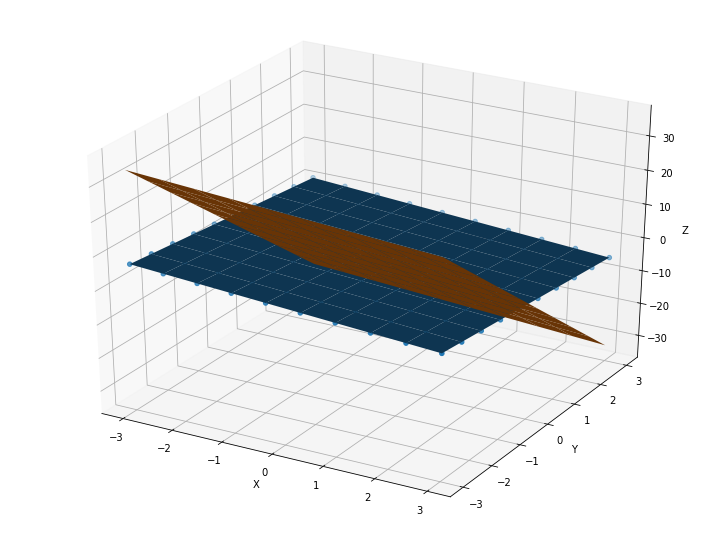

In [278]:
# plot point cloud and inferred plane
xs = points[0]
ys = points[1]
zs = points[2]
ax = plt.axes(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(xs, ys, zs, linewidth=1)

# plot inferred plan
X, Y, Z = get_plane_point_cloud(solution[0], solution[1], solution[2], solution[3])
ax.plot_surface(X, Y, Z)

# plot reference plan
ref_plane_a = 1
ref_plane_b = 10
ref_plane_c = 1
ref_plane_d = 1

X, Y, Z = get_plane_point_cloud(ref_plane_a, ref_plane_b, ref_plane_c, ref_plane_d)
ax.plot_surface(X, Y, Z)


In [279]:
def calculate_angle_between_planes(a1, b1, c1, a2, b2, c2):
    n = a1 + b1 + c1
    d1 = math.sqrt(a1*a1 + b1*b1 + c1*c1)
    d2 = math.sqrt(a2*a2 + b2*b2 + c2*c2)
    cos_angle = round(n/(d1*d2), 2)
    print(cos_angle)
    angle = math.degrees(math.acos(cos_angle))
    print(angle)

In [280]:
calculate_angle_between_planes(solution[0], solution[1], solution[2], ref_plane_a, ref_plane_b, ref_plane_c)

-0.17
99.78781905671397
